In [1]:
import pandas as pd
import numpy as np
import math as math
import random
from sklearn.utils import shuffle
import sklearn.preprocessing  as prepro
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.utils import resample
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines


#constants
random_state = 42
plotColor = ['b','g','r','m','c', 'y']
markers = ['+','o','*','^','v','>','<']

#set up
sns.set(style='whitegrid')
%matplotlib inline

Customer Churn rate is defined as the percentage of customers that company lost over all the customers at the beginning of the interval. The data used in this analysis consists of customer demographics, usage and account based information. Main objective here is to analyze churn customers’ behavior and develop strategies to increase customer retention.

# Exploratory Data Analysis

In [2]:
data_file_path = r"C:\Users\aleen\Data\telecom_customer_churn.csv"
df_raw = pd.read_csv(data_file_path)
df_raw.head(10)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
5,0013-MHZWF,Female,23,No,3,Midpines,95345,37.581496,-119.972762,0,...,Credit Card,69.40,571.45,0.00,0,150.93,722.38,Stayed,NaN,NaN
6,0013-SMEOE,Female,67,Yes,0,Lompoc,93437,34.757477,-120.550507,1,...,Bank Withdrawal,109.70,7904.25,0.00,0,707.16,8611.41,Stayed,NaN,NaN
7,0014-BMAQU,Male,52,Yes,0,Napa,94558,38.489789,-122.270110,8,...,Credit Card,84.65,5377.80,0.00,20,816.48,6214.28,Stayed,NaN,NaN
8,0015-UOCOJ,Female,68,No,0,Simi Valley,93063,34.296813,-118.685703,0,...,Bank Withdrawal,48.20,340.35,0.00,0,73.71,414.06,Stayed,NaN,NaN
9,0016-QLJIS,Female,43,Yes,1,Sheridan,95681,38.984756,-121.345074,3,...,Credit Card,90.45,5957.90,0.00,0,1849.90,7807.80,Stayed,NaN,NaN


# Dimensionality and Data Checks

In [3]:
df_raw.shape

(7043, 38)

With 7043 observations, the dataset has 38 features.

In [4]:
# feature exploration

df_raw.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [5]:
# Checking for any NULL values

df_raw.isnull().any()

Customer ID                          False
Gender                               False
Age                                  False
Married                              False
Number of Dependents                 False
City                                 False
Zip Code                             False
Latitude                             False
Longitude                            False
Number of Referrals                  False
Tenure in Months                     False
Offer                                False
Phone Service                        False
Avg Monthly Long Distance Charges     True
Multiple Lines                        True
Internet Service                     False
Internet Type                         True
Avg Monthly GB Download               True
Online Security                       True
Online Backup                         True
Device Protection Plan                True
Premium Tech Support                  True
Streaming TV                          True
Streaming M

In [6]:
# Duplicate value check

df_raw.duplicated().any()

False

In [7]:
# Exploring data types of each feature

df_raw.dtypes

Customer ID                           object
Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming 

Dealing with null values, by doing a conditional imputation method. In case of 'Avg Monthly Long Distance Charges' and 'Multiple lines', we can use it as 0 and NA for those having 'No' in column service 'Phone Service'.

In [8]:
def data_impute_fn(df_check):
    # Impute 0 for null values in the 'Avg Monthly Long Distance Charges' column
    df_check['Avg Monthly Long Distance Charges'].fillna(0, inplace=True)

    # Impute 'NA' for null values in the 'Multiple Lines' column
    df_check['Multiple Lines'].fillna('NA', inplace=True)
    
    columns_to_fill_na = ['Internet Type','Online Security','Online Backup','Device Protection Plan','Premium Tech Support','Streaming TV','Streaming Movies','Streaming Music','Unlimited Data']
    #Impute 'NA' for null values in the columns 'Internet Type','Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV','Streaming Movies','Streaming Music', 'Unlimited Data'
    df_check.loc[:,columns_to_fill_na]=df_check.loc[:,columns_to_fill_na].fillna('NA')
    
    # Impute 0 for null values in the column 'Avg Monthly GB Download'
    df_check['Avg Monthly GB Download'].fillna(0, inplace=True)
    
    # Impute 'NA' for null values in colums 'Churn Category', 'Churn Reason'
    df_check['Churn Category'].fillna('NA', inplace=True)
    df_check['Churn Reason'].fillna('NA', inplace=True)
    
    return df_check

In [9]:
df1_raw = data_impute_fn(df_raw)
df1_raw.head(10)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NA,NA
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NA,NA
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
5,0013-MHZWF,Female,23,No,3,Midpines,95345,37.581496,-119.972762,0,...,Credit Card,69.40,571.45,0.00,0,150.93,722.38,Stayed,NA,NA
6,0013-SMEOE,Female,67,Yes,0,Lompoc,93437,34.757477,-120.550507,1,...,Bank Withdrawal,109.70,7904.25,0.00,0,707.16,8611.41,Stayed,NA,NA
7,0014-BMAQU,Male,52,Yes,0,Napa,94558,38.489789,-122.270110,8,...,Credit Card,84.65,5377.80,0.00,20,816.48,6214.28,Stayed,NA,NA
8,0015-UOCOJ,Female,68,No,0,Simi Valley,93063,34.296813,-118.685703,0,...,Bank Withdrawal,48.20,340.35,0.00,0,73.71,414.06,Stayed,NA,NA
9,0016-QLJIS,Female,43,Yes,1,Sheridan,95681,38.984756,-121.345074,3,...,Credit Card,90.45,5957.90,0.00,0,1849.90,7807.80,Stayed,NA,NA


In [10]:
df1_raw.isnull().any()

Customer ID                          False
Gender                               False
Age                                  False
Married                              False
Number of Dependents                 False
City                                 False
Zip Code                             False
Latitude                             False
Longitude                            False
Number of Referrals                  False
Tenure in Months                     False
Offer                                False
Phone Service                        False
Avg Monthly Long Distance Charges    False
Multiple Lines                       False
Internet Service                     False
Internet Type                        False
Avg Monthly GB Download              False
Online Security                      False
Online Backup                        False
Device Protection Plan               False
Premium Tech Support                 False
Streaming TV                         False
Streaming M

Now, we would be renaming and transforming the columns to standard format for further analysis.

In [11]:
#to drop unused columns
def drop_unused_columns(df_drop, columns_to_keep):
    # Identify columns to drop
    columns_to_drop = [col for col in df_drop.columns if col not in columns_to_keep]

    # Drop unnecessary columns
    df_drop.drop(columns=columns_to_drop, inplace=True)

    return df_drop

In [12]:
columns_to_keep_churn_analysis = ['Gender', 'Age', 'Married', 'Number of Dependents',
    'City', 'Number of Referrals','Tenure in Months', 'Offer', 'Phone Service', 'Avg Monthly Long Distance Charges',
    'Multiple Lines', 'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
    'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
    'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
    'Paperless Billing', 'Payment Method', 'Monthly Charge', 'Total Charges',
    'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges',
    'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'
]

# Call the function to drop unused columns
df2_raw = drop_unused_columns(df1_raw, columns_to_keep_churn_analysis)
df2_raw.head(10)

,Gender,Age,Married,Number of Dependents,City,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,Female,37,Yes,0,Frazier Park,2,9,None,Yes,42.39,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NA,NA
1,Male,46,No,0,Glendale,0,9,None,Yes,10.69,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NA,NA
2,Male,50,No,0,Costa Mesa,0,4,Offer E,Yes,33.65,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,Male,78,Yes,0,Martinez,1,13,Offer D,Yes,27.82,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,Female,75,Yes,0,Camarillo,3,3,None,Yes,7.38,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
5,Female,23,No,3,Midpines,0,9,Offer E,Yes,16.77,...,Credit Card,69.40,571.45,0.00,0,150.93,722.38,Stayed,NA,NA
6,Female,67,Yes,0,Lompoc,1,71,Offer A,Yes,9.96,...,Bank Withdrawal,109.70,7904.25,0.00,0,707.16,8611.41,Stayed,NA,NA
7,Male,52,Yes,0,Napa,8,63,Offer B,Yes,12.96,...,Credit Card,84.65,5377.80,0.00,20,816.48,6214.28,Stayed,NA,NA
8,Female,68,No,0,Simi Valley,0,7,Offer E,Yes,10.53,...,Bank Withdrawal,48.20,340.35,0.00,0,73.71,414.06,Stayed,NA,NA
9,Female,43,Yes,1,Sheridan,3,65,None,Yes,28.46,...,Credit Card,90.45,5957.90,0.00,0,1849.90,7807.80,Stayed,NA,NA


In [13]:
df2_raw.shape

(7043, 34)

In [14]:
#data transformation
def Data_transformation(df_transform):
    df_tra = df_transform.copy()
    df_tra['Gender'] = df_tra.Gender.map({'Male':1,'Female':0})
    df_tra['Married'] = df_tra.Married.map({'Yes':1,'No':0})
    df_tra['Phone Service'] = df_tra['Phone Service'].map({'Yes':1,'No':0})
    df_tra['Multiple Lines'] = df_tra['Multiple Lines'].map({'Yes':1,'No':0, 'NA':0})
    df_tra['Internet Service'] = df_tra['Internet Service'].map({'Yes':1,'No':0})
    df_tra['Online Security'] = df_tra['Online Security'].map({'Yes':1,'No':0, 'NA':0})
    df_tra['Online Backup'] = df_tra['Online Backup'].map({'Yes':1,'No':0, 'NA':0})
    df_tra['Device Protection Plan'] = df_tra['Device Protection Plan'].map({'Yes':1,'No':0, 'NA':0})
    df_tra['Premium Tech Support'] = df_tra['Premium Tech Support'].map({'Yes':1,'No':0, 'NA':0})
    df_tra['Streaming TV'] = df_tra['Streaming TV'].map({'Yes':1,'No':0, 'NA':0})
    df_tra['Streaming Movies'] = df_tra['Streaming Movies'].map({'Yes':1,'No':0, 'NA':0})
    df_tra['Streaming Music'] = df_tra['Streaming Music'].map({'Yes':1,'No':0, 'NA':0})
    df_tra['Unlimited Data'] = df_tra['Unlimited Data'].map({'Yes':1,'No':0, 'NA':0})
    df_tra['Paperless Billing'] = df_tra['Paperless Billing'].map({'Yes':1,'No':0})
    
    #add a new column to check if the customer is contracted or not, and the customer churned or not
    df_tra['IsContracted'] = df_tra.Contract.map({'One Year':1,'Two Year':1,'Month-to-Month':0})
    df_tra['Churned'] = df_tra['Customer Status'].map({'Churned':1,'Stayed':0,'Joined':0})
    df_tra['Dependents'] = df_tra['Number of Dependents'].apply(lambda x: 0 if x == 0 else 1)
    df_tra['Senior Citizen'] = (df_tra['Age'] > 60).astype(int)
    
    return df_tra


In [15]:
df3_raw = Data_transformation(df2_raw)
df3_raw.head(10)

,Gender,Age,Married,Number of Dependents,City,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,IsContracted,Churned,Dependents,Senior Citizen
0,0,37,1,0,Frazier Park,2,9,None,1,42.39,...,0,381.51,974.81,Stayed,NA,NA,1,0,0,0
1,1,46,0,0,Glendale,0,9,None,1,10.69,...,10,96.21,610.28,Stayed,NA,NA,0,0,0,0
2,1,50,0,0,Costa Mesa,0,4,Offer E,1,33.65,...,0,134.60,415.45,Churned,Competitor,Competitor had better devices,0,1,0,0
3,1,78,1,0,Martinez,1,13,Offer D,1,27.82,...,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,0,1,0,1
4,0,75,1,0,Camarillo,3,3,None,1,7.38,...,0,22.14,289.54,Churned,Dissatisfaction,Network reliability,0,1,0,1
5,0,23,0,3,Midpines,0,9,Offer E,1,16.77,...,0,150.93,722.38,Stayed,NA,NA,0,0,1,0
6,0,67,1,0,Lompoc,1,71,Offer A,1,9.96,...,0,707.16,8611.41,Stayed,NA,NA,1,0,0,1
7,1,52,1,0,Napa,8,63,Offer B,1,12.96,...,20,816.48,6214.28,Stayed,NA,NA,1,0,0,0
8,0,68,0,0,Simi Valley,0,7,Offer E,1,10.53,...,0,73.71,414.06,Stayed,NA,NA,1,0,0,1
9,0,43,1,1,Sheridan,3,65,None,1,28.46,...,0,1849.90,7807.80,Stayed,NA,NA,1,0,1,0


As the next step, we are defining the categorical columns (of which there is binary and nominal) and numerical columns and target column, which is obviously the 'Churned' column.

In [16]:
categorical = ['Gender','Married','City','Offer','Phone Service','Multiple Lines', 'Internet Service', 'Internet Type',
               'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
               'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data','Paperless Billing', 'Contract',
               'Payment Method','IsContracted','Churned','Dependents','Senior Citizen', 'Churn Category', 'Churn Reason']

binary = ['Gender','Married','Phone Service','Multiple Lines', 'Internet Service','Online Security', 
          'Online Backup', 'Device Protection Plan', 'Premium Tech Support','Streaming TV', 'Streaming Movies',
          'Streaming Music', 'Unlimited Data','Paperless Billing','IsContracted',
          'Churned','Dependents','Senior Citizen']

nominal = ['City','Offer', 'Internet Type', 'Payment Method','Contract', 'Churn Category', 'Churn Reason']

numerical = ['Age','Number of Dependents','Number of Referrals','Tenure in Months','Avg Monthly Long Distance Charges',
            'Avg Monthly GB Download','Monthly Charge', 'Total Charges', 'Total Refunds', 
             'Total Extra Data Charges', 'Total Long Distance Charges','Total Revenue']

In [17]:
#checking the categorical columns
for column in categorical:
    unique_entries_counts = df3_raw[column].value_counts()
    print(f"Unique entries in '{column}':\n{unique_entries_counts}")
    

Unique entries in 'Gender':
1    3555
0    3488
Name: Gender, dtype: int64
Unique entries in 'Married':
0    3641
1    3402
Name: Married, dtype: int64
Unique entries in 'City':
Los Angeles         293
San Diego           285
San Jose            112
Sacramento          108
San Francisco       104
                   ... 
Johannesburg          2
South Lake Tahoe      2
Jacumba               2
Holtville             2
Eldridge              2
Name: City, Length: 1106, dtype: int64
Unique entries in 'Offer':
None       3877
Offer B     824
Offer E     805
Offer D     602
Offer A     520
Offer C     415
Name: Offer, dtype: int64
Unique entries in 'Phone Service':
1    6361
0     682
Name: Phone Service, dtype: int64
Unique entries in 'Multiple Lines':
0    4072
1    2971
Name: Multiple Lines, dtype: int64
Unique entries in 'Internet Service':
1    5517
0    1526
Name: Internet Service, dtype: int64
Unique entries in 'Internet Type':
Fiber Optic    3035
DSL            1652
NA             1526


In [18]:
#checking numerical entries
df3_raw[numerical].describe()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,1.951867,32.386767,22.958954,20.515405,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,3.001199,24.542061,15.448113,20.418940,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,0.000000,9.000000,9.210000,3.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,0.000000,29.000000,22.890000,17.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,3.000000,55.000000,36.395000,27.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


As per the descriptive analysis, we can see that the average age of the subscriber is 47, average tenure of a subscriber is 32 months, average monthly Usage is 20.5 GB, and the average total revenue is $3034.3.

# Churn Rate (Overall and category-wise)

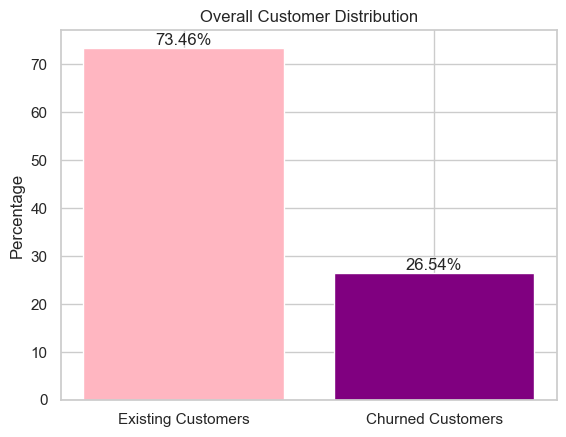

Churn Rate: 26.54%
Existing Customers Rate: 73.46%


<Figure size 640x480 with 0 Axes>

In [19]:
import os
churn_counts = df3_raw['Churned'].value_counts()
churn_rate = (churn_counts[1] / df3_raw.shape[0]) * 100
existing_rate = (churn_counts[0] / df3_raw.shape[0]) * 100

# Plotting the bar chart with data labels
fig, ax = plt.subplots()
bars = ax.bar(['Existing Customers', 'Churned Customers'], [existing_rate, churn_rate], color=['lightpink', 'purple'])

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

plt.ylabel('Percentage')
plt.title('Overall Customer Distribution')
plt.show()

# Specify the path and filename for saving the image
save_path = os.path.join(r'C:\Users\aleen\Data', 'churn_rate_chart.png')

# Save the figure as an image
plt.savefig(save_path)

print(f"Churn Rate: {churn_rate:.2f}%")
print(f"Existing Customers Rate: {existing_rate:.2f}%")

In [20]:
def plot_churn_rate(df, feature):
    churn_rates = df.groupby([feature, 'Churned']).size().unstack().fillna(0)
    churn_rates['Churn Rate'] = (churn_rates[1] / (churn_rates[0] + churn_rates[1])) * 100
    churn_rates['Existing Rate'] = (churn_rates[0] / (churn_rates[0] + churn_rates[1])) * 100

    # Reshaping the DataFrame for plotting
    churn_rates_plot = churn_rates[['Churn Rate', 'Existing Rate']].reset_index()

    # Plotting the bar chart
    plt.figure(figsize=(8, 6))

    # Bar widths and positions
    bar_width = 0.35
    bar_positions = range(len(churn_rates_plot))

    # Plotting Churn Rate bars
    plt.bar(bar_positions, churn_rates_plot['Churn Rate'], width=bar_width, color='purple', label='Churn Rate')

    # Plotting Existing Rate bars
    plt.bar([pos + bar_width for pos in bar_positions], churn_rates_plot['Existing Rate'], width=bar_width, color='lightpink', label='Existing Rate')

    # Adding data labels
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height),
                           ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    # X-axis labels
    plt.xlabel(feature)
    plt.xticks([pos + bar_width/2 for pos in bar_positions], churn_rates_plot[feature])

    plt.ylabel('Percentage')
    plt.title(f'Churn and Existing Rates by {feature}')
    plt.legend(title='Rate')
    plt.show()

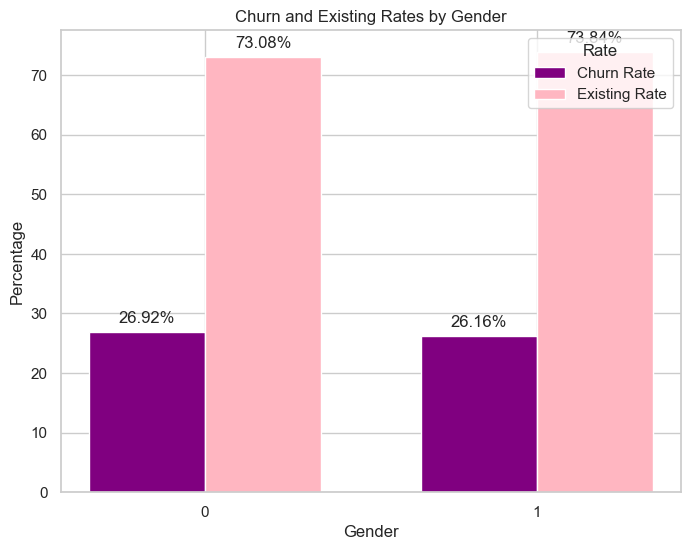

In [21]:
#visualise churn rate

# Churn rate by Gender
plot_churn_rate(df3_raw,'Gender')

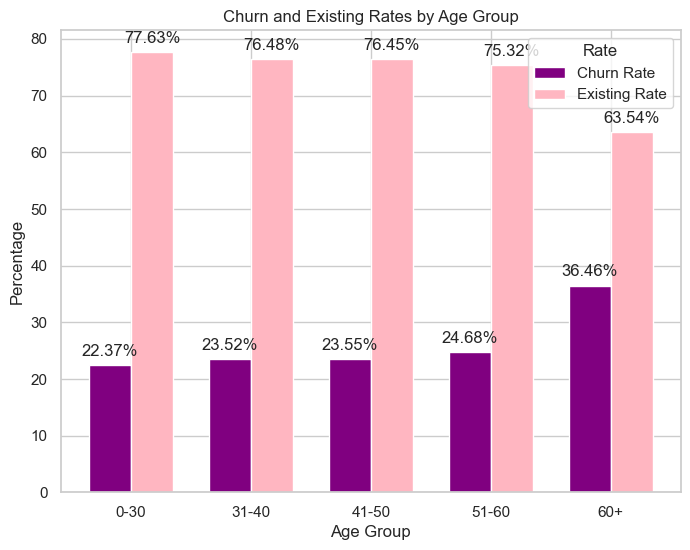

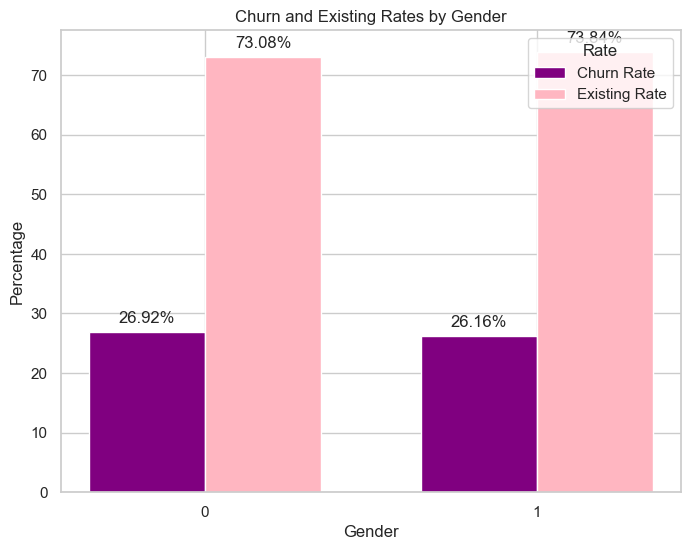

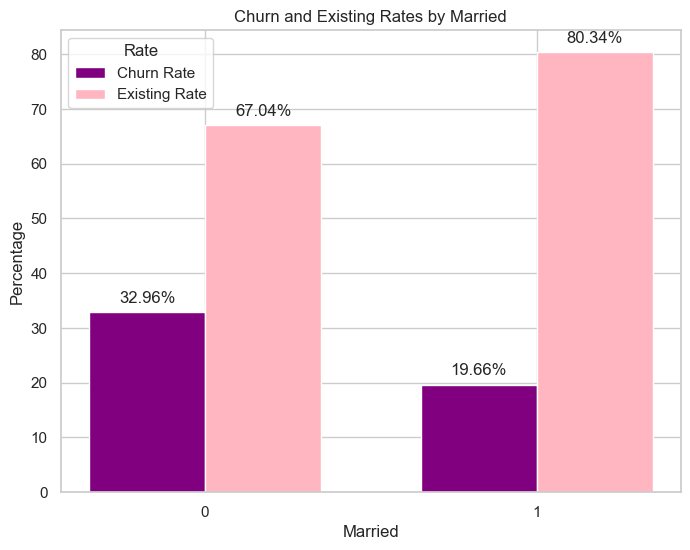

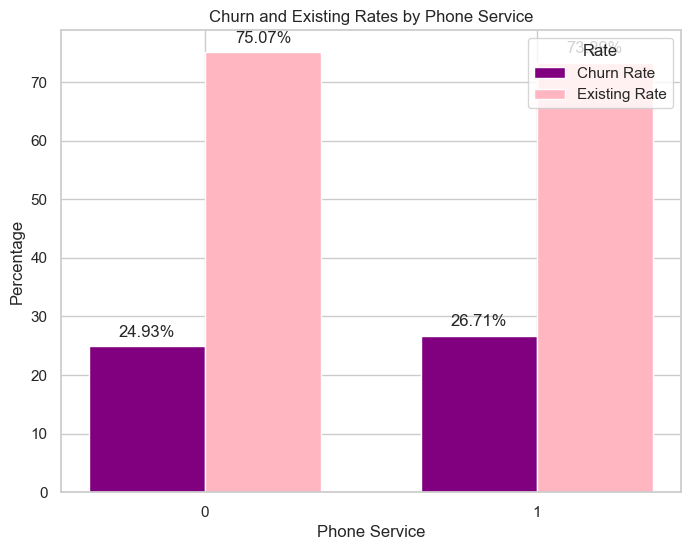

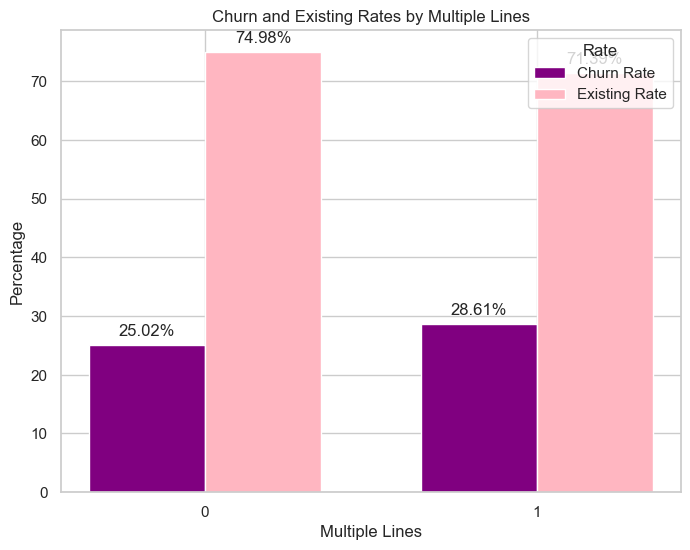

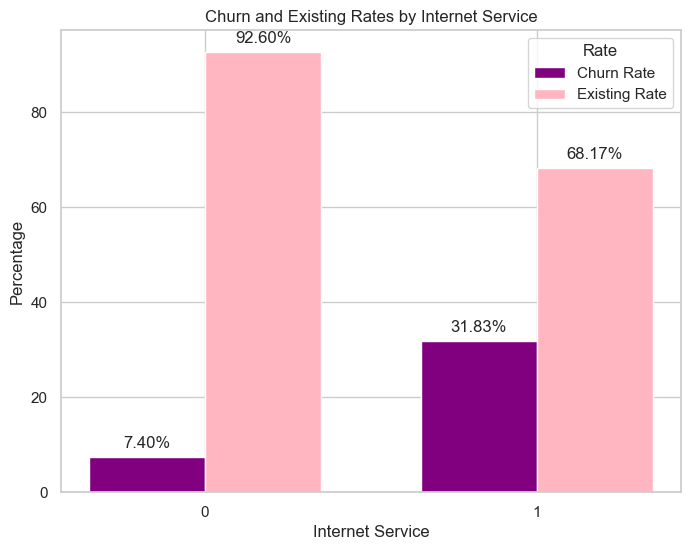

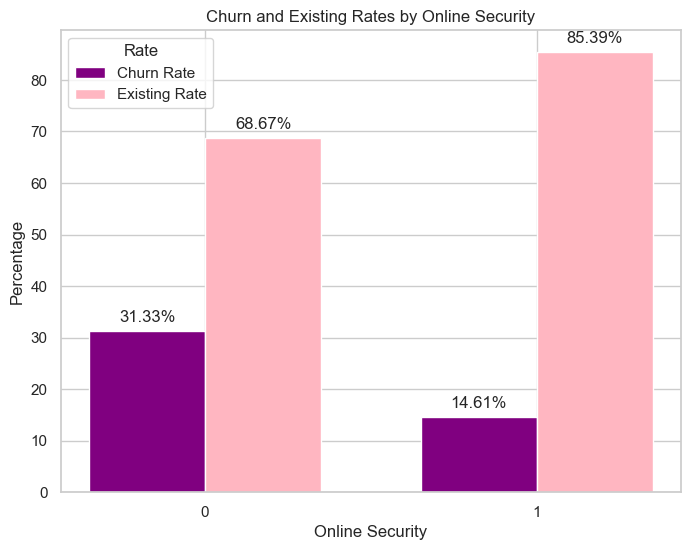

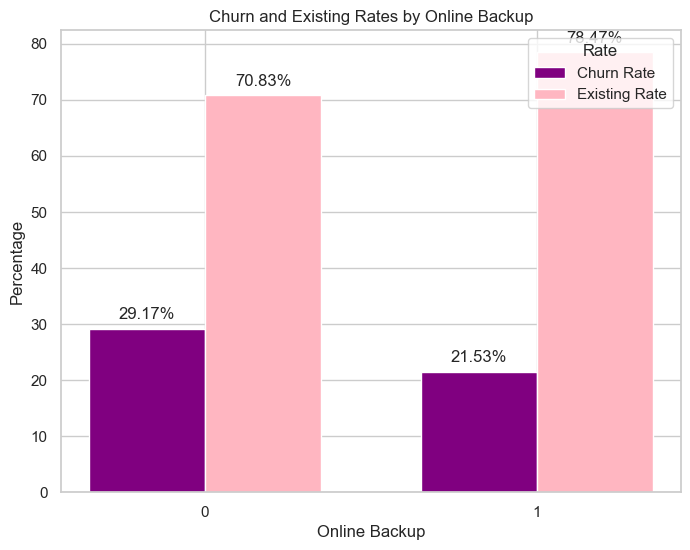

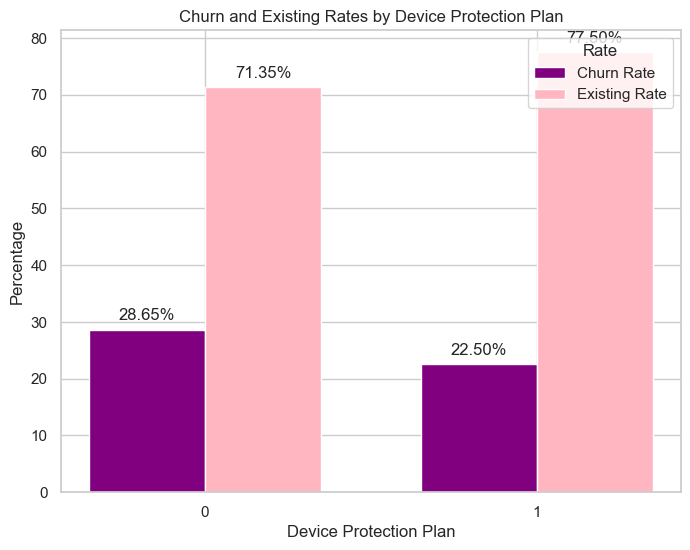

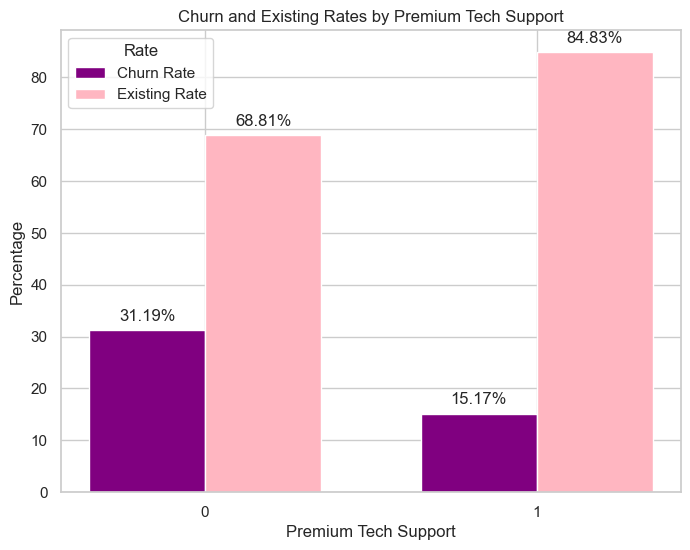

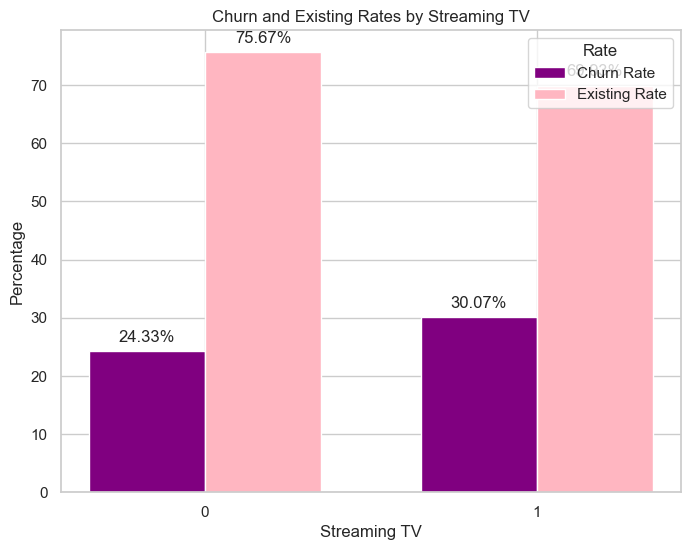

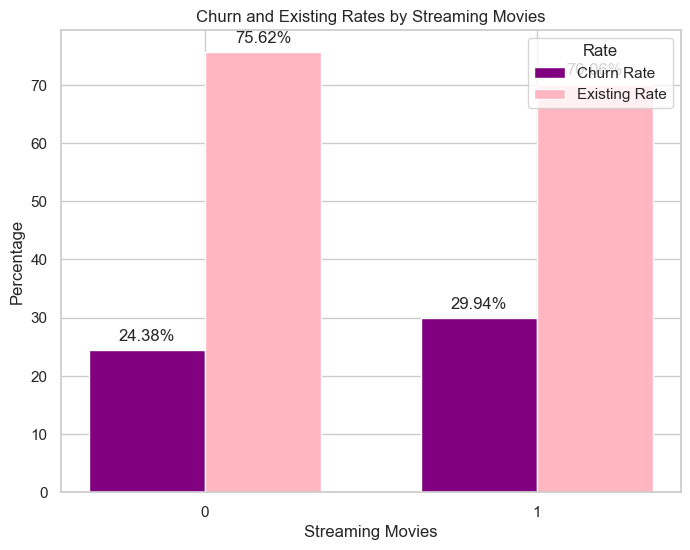

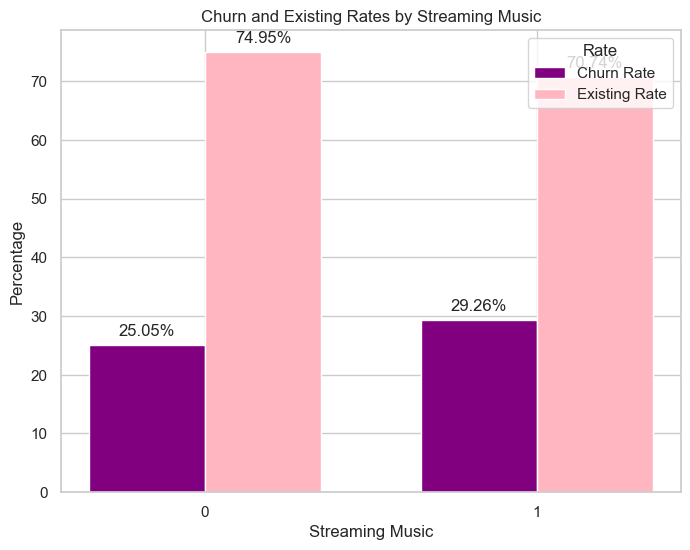

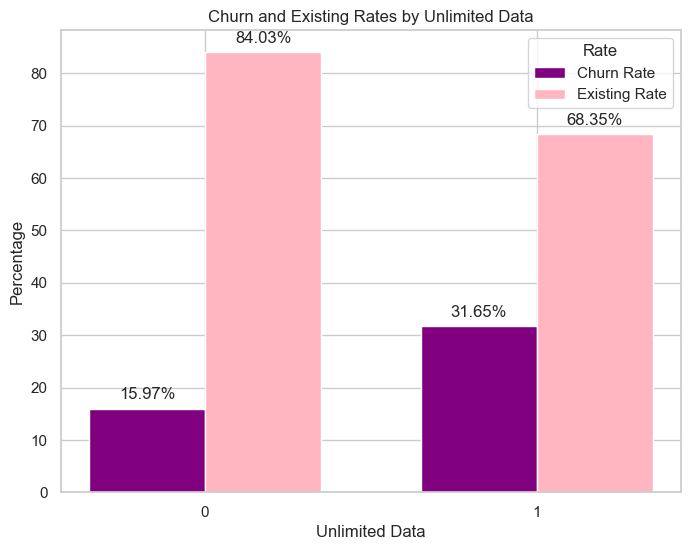

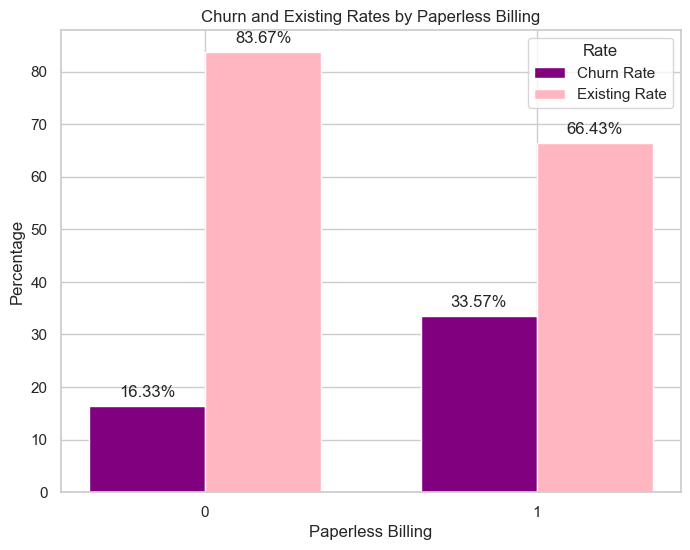

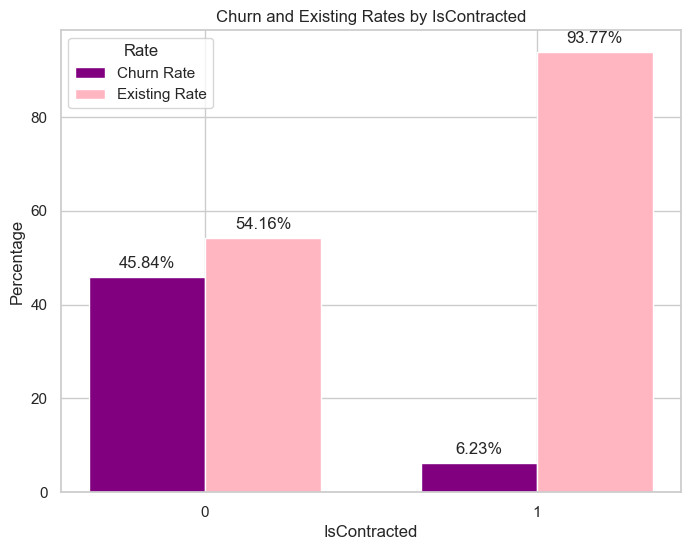

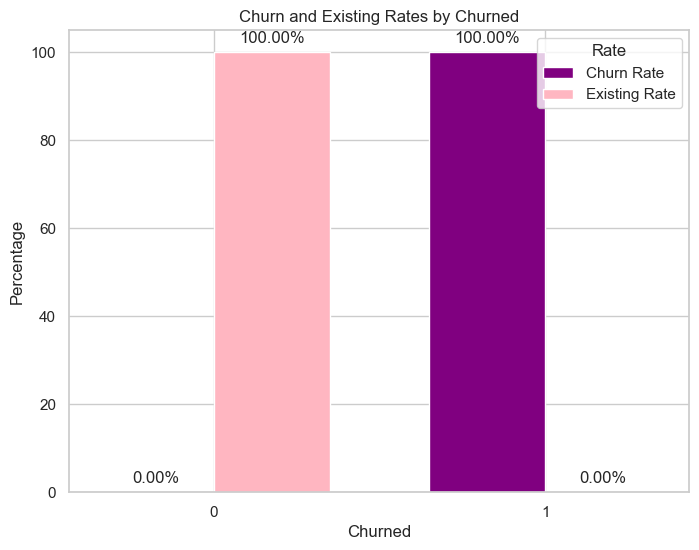

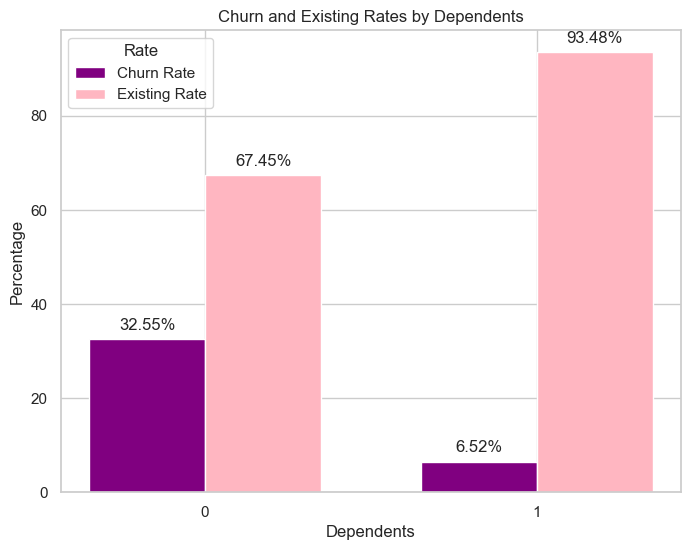

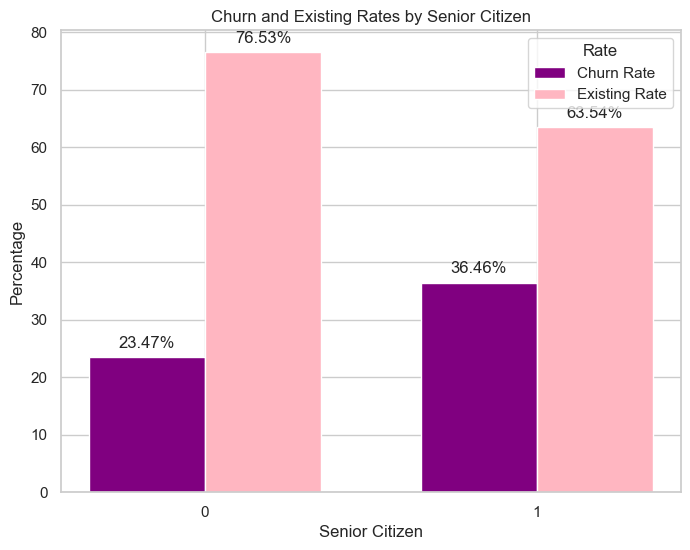

In [22]:
# Churn rate by Age (histogram with age groups)
df3_raw['Age Group'] = pd.cut(df3_raw['Age'], bins=[0, 30, 40, 50, 60, 100], labels=['0-30', '31-40', '41-50', '51-60', '60+'])
plot_churn_rate(df3_raw,'Age Group')



for i in binary:
    plot_churn_rate(df3_raw,i)

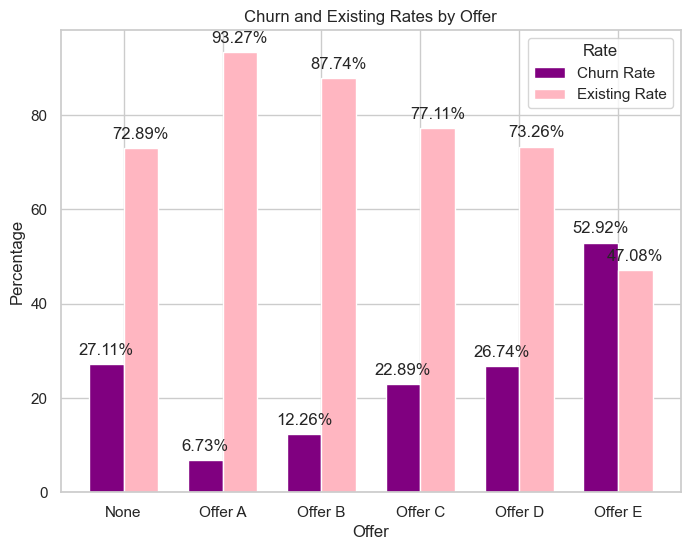

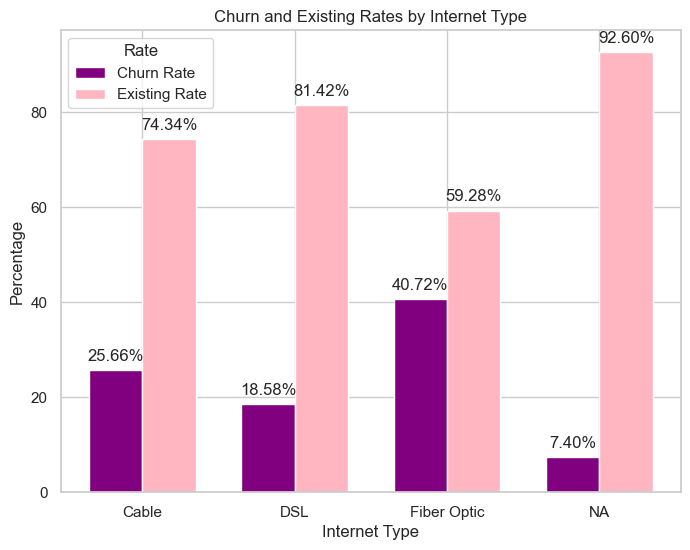

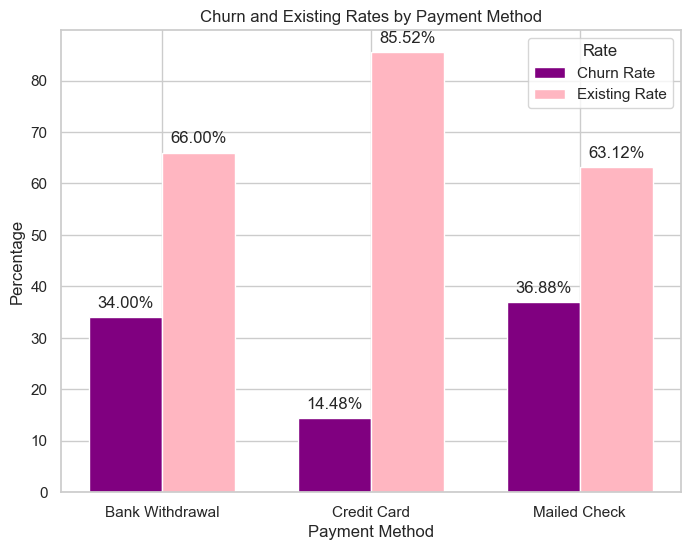

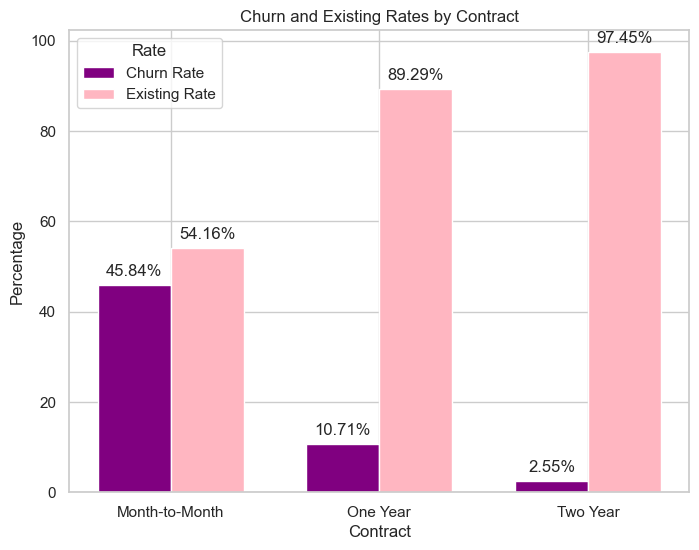

In [23]:
for i in nominal:
    if (i != 'City') and (i != 'Churn Category') and (i != 'Churn Reason'):
        plot_churn_rate(df3_raw, i)

In [24]:
churn_rate = df3_raw.groupby('Churned')
# Mean summary of customers (Churn vs Non churn)
print(churn_rate['Age','Number of Dependents','Number of Referrals','Tenure in Months','Avg Monthly Long Distance Charges',
            'Avg Monthly GB Download','Monthly Charge', 'Total Charges', 'Total Refunds', 
             'Total Extra Data Charges', 'Total Long Distance Charges','Total Revenue'].mean())

               Age  Number of Dependents  Number of Referrals  \
Churned                                                         
0        45.344414              0.595284             2.468690   
1        49.735688              0.118245             0.521134   

         Tenure in Months  Avg Monthly Long Distance Charges  \
Churned                                                        
0               37.591225                          22.883572   
1               17.979133                          23.167635   

         Avg Monthly GB Download  Monthly Charge  Total Charges  \
Churned                                                           
0                      19.915733       60.073618    2550.792103   
1                      22.175495       73.347592    1531.796094   

         Total Refunds  Total Extra Data Charges  Total Long Distance Charges  \
Churned                                                                         
0             2.122279                  6.752996   

C:\Users\aleen\AppData\Local\Temp\ipykernel_18904\2566360631.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(churn_rate['Age','Number of Dependents','Number of Referrals','Tenure in Months','Avg Monthly Long Distance Charges',


In [25]:
def correlation(corr,selected_columns):
    df_corr = corr[selected_columns]
    # Calculate correlation matrix
    correlation_matrix = df_corr.corr()

    # Plot the heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Heatmap')
    plt.show()

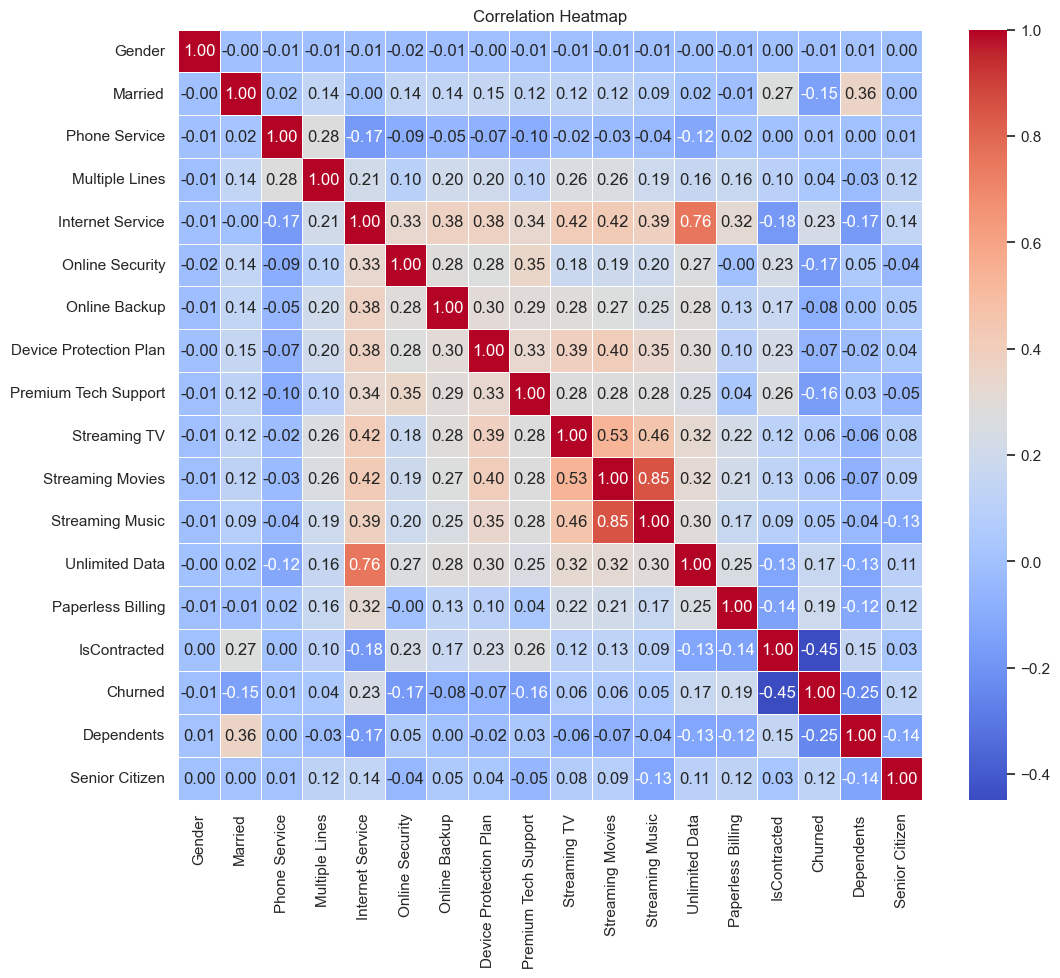

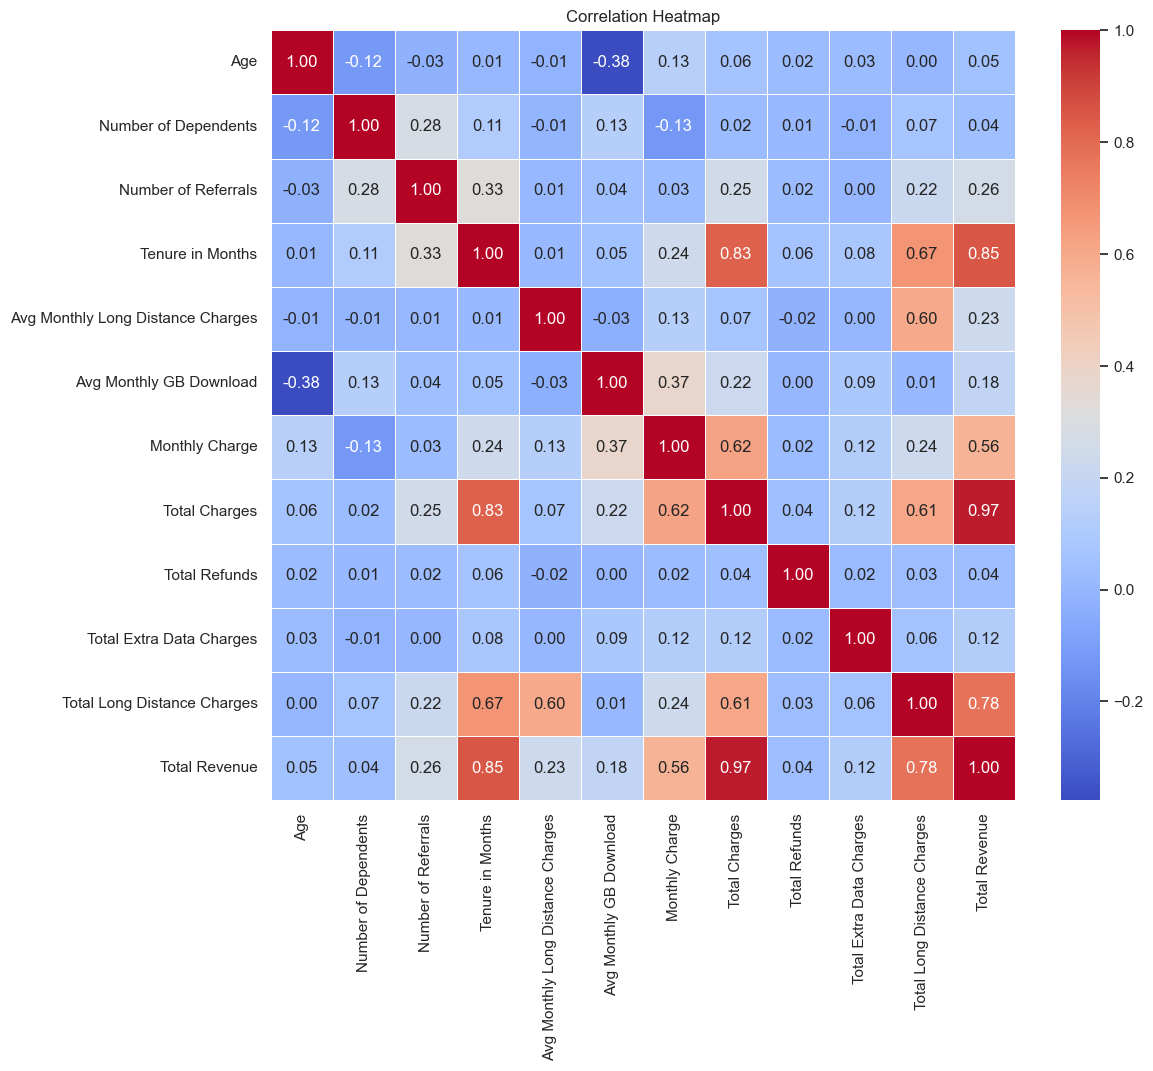

In [26]:
correlation(df3_raw,binary)
correlation(df3_raw,numerical)


Also, conducting Univariate Feature Selection (ANOVA)

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Select numerical features and 'Churned' for analysis
X = df3_raw[numerical]
y = df3_raw['Churned']

# Use ANOVA for feature selection
selector = SelectKBest(score_func=f_classif, k='all')
X_new = selector.fit_transform(X, y)

# Get selected features and their scores
selected_features = X.columns[selector.get_support()]
feature_scores = selector.scores_

# Display selected features and their scores
feature_selection_results = pd.DataFrame({'Feature': selected_features, 'Score': feature_scores})
print(feature_selection_results)

                              Feature        Score
0                                 Age    95.633145
1                Number of Dependents   353.957964
2                 Number of Referrals   629.815713
3                    Tenure in Months  1001.362827
4   Avg Monthly Long Distance Charges     0.464221
5             Avg Monthly GB Download    16.854422
6                      Monthly Charge   257.499454
7                       Total Charges   288.950681
8                       Total Refunds     8.009925
9            Total Extra Data Charges     0.358909
10        Total Long Distance Charges   371.098867
11                      Total Revenue   368.475042


In [28]:
# Select binary features and 'Churned' for analysis
X = df3_raw[binary]
y = df3_raw['Churned']

# Use ANOVA for feature selection
selector = SelectKBest(score_func=f_classif, k='all')
X_new = selector.fit_transform(X, y)

# Get selected features and their scores
selected_features = X.columns[selector.get_support()]
feature_scores = selector.scores_

# Display selected features and their scores
feature_selection_results = pd.DataFrame({'Feature': selected_features, 'Score': feature_scores})
print(feature_selection_results)

                   Feature        Score
0                   Gender     0.522257
1                  Married   163.060036
2            Phone Service     1.004266
3           Multiple Lines    11.341439
4         Internet Service   385.698588
5          Online Security   212.666199
6            Online Backup    47.962955
7   Device Protection Plan    30.954780
8     Premium Tech Support   196.255405
9             Streaming TV    28.261124
10        Streaming Movies    26.628665
11         Streaming Music    14.662987
12          Unlimited Data   200.868969
13       Paperless Billing   268.985218
14            IsContracted  1772.217861
15                 Churned          inf
16              Dependents   463.582354
17          Senior Citizen   111.630755


C:\Users\aleen\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
